In [1]:
# imports
import random
random.seed()

In [92]:
class Ship:
    def __init__(self, max_hp, resists_shield, resists_armour, resists_hull, shield_regen, signature_radius):
        self.max_hp = max_hp
        self.resists_shield = resists_shield
        self.resists_armour = resists_armour
        self.resists_hull = resists_hull
        self.current_hp = list(max_hp)
        self.shield_regen = shield_regen
        self.signature_radius = signature_radius
        self.velocity = 0.0001

    def RegenShield(self):
        if (self.max_hp[0] > self.current_hp[0]):
            if (self.max_hp[0] - self.current_hp[0] > self.shield_regen):
                self.current_hp[0] += self.shield_regen
            else:
                self.current_hp[0] = self.max_hp[0]
    def set_velocity(self, velocity):
        self.velocity = velocity
                
    def RepairArmour(self, repair_amount):
        if (self.max_hp[1] > self.current_hp[1]):
            if (self.max_hp[1] - self.current_hp[1] > repair_amount):
                self.current_hp[1] += repair_amount
            else:
                self.current_hp[1] = self.max_hp[1]
    
    def TakeDamage(self, damage):

        if sum(damage) == 0: return False
            
        shield_damage_taken = [damage[i] * (1-self.resists_shield[i]) for i in range(len(damage))]
        total_damage = sum(shield_damage_taken)

        if (total_damage < self.current_hp[0]):
            self.current_hp[0] -= total_damage
            new_damage = [0,0,0,0]
        else:
            damage_absorbed = self.current_hp[0]
            self.current_hp[0] = 0
            damage_remaining = (total_damage - damage_absorbed)
            new_damage = [(damage_remaining * (shield_damage_taken[i] / total_damage))for i in range(len(damage))]
            new_damage = [new_damage[i]/(1 - self.resists_shield[i]) for i in range(len(damage))]

        armour_damage_taken = [new_damage[i] * (1-self.resists_armour[i]) for i in range(len(damage))]
        total_damage = sum(armour_damage_taken)

        if (total_damage < self.current_hp[1]):
            self.current_hp[1] -= total_damage
            new_damage = [0,0,0,0]
        else:
            damage_absorbed = self.current_hp[1]
            self.current_hp[1] = 0
            damage_remaining = (total_damage - damage_absorbed)
            new_damage = [(damage_remaining * (armour_damage_taken[i] / total_damage))for i in range(len(damage))]
            new_damage = [new_damage[i]/(1 - self.resists_armour[i]) for i in range(len(damage))]
        
        hull_damage_taken = [new_damage[i] * (1-self.resists_hull[i]) for i in range(len(damage))]
        total_damage = sum(hull_damage_taken)

        if (total_damage < self.current_hp[2]):
            self.current_hp[2] -= total_damage
            new_damage = [0,0,0,0]
        else:
            self.current_hp[2] = 0
            

       
class Sansha:
    def __init__(self, damage, turret, missile, tracking, exp_radius, exp_velocity, trans_velo, distance, optimal, falloff, cycle_time, random_offset):
        self.damage = damage
        self.turret = turret
        self.missile = missile
        self.tracking = tracking
        self.exp_radius = exp_radius
        self.exp_velocity = exp_velocity
        self.trans_velo = trans_velo
        self.distance = distance
        self.optimal = optimal
        self.falloff = falloff
        self.cycle_time = cycle_time
        self.random_offset = random_offset

class Logi:
    def __init__(self, amount, cycle_time, offset):
        self.amount = amount
        self.cycle_time = cycle_time
        self.offset = offset


def MissileDamage(damage, sig, velocity, exp_radius, exp_velocity):
    adjusted_damage = [damage[i]*min(1, sig/exp_radius, ((sig*exp_velocity)/(exp_radius*velocity))**0.904) for i in range(len(damage))]
    return adjusted_damage
    
def TurretDamage(damage, tracking, orbit_velocity, orbit_radius, sig, optimal, falloff):
    x = random.random()
    hit_chance = 0.5 ** ( (((orbit_velocity/orbit_radius) * 40000) / (tracking * sig)) ** 2 + ((max(0, (orbit_radius - optimal))) / falloff) ** 2)
    if( x < 0.01 ):
        adjusted_damage = [damage[i]* 3 for i in range(len(damage))]
        return adjusted_damage
    elif( x < hit_chance ):
        adjusted_damage = [damage[i] * (x + 0.49) for i in range(len(damage))]
        print(sum(adjusted_damage))
        return adjusted_damage
    else:
        adjusted_damage = [0,0,0,0]
        print("miss")
        return adjusted_damage


In [93]:
number_Tama = 4
number_Schmaeel = 0
number_Renyn = 0
number_Eystur = 5
number_Auga = 2
number_Romi = 0
number_Deltole = 1
number_SNC = 0
Sanshas = []


Tamas = [Sansha([0, 0, 1350, 1350], False, True, 0, 401, 160, 0, 12000, 0, 0, 9.0, round(9*random.random(), 2)) for i in range(number_Tama)]
Schmaeels = [Sansha([126, 126, 0, 0], True , False, 0.7, 0, 0, 0, 12000, 12000, 4000, 5.0, round(5*random.random(), 2)) for i in range(number_Schmaeel)]
Renyns = [Sansha([480, 480, 0, 0], True, False, 0.4, 0, 0, 0, 9000, 10000, 1000, 5.0, round(5*random.random(), 2)) for i in range(number_Renyn)]
Eysturs = [Sansha([300, 300, 0, 0], True , False, 0.4, 0, 0, 0, 10000, 10000, 1000, 5.0, round(5*random.random(), 2)) for i in range(number_Eystur)]
Augas = [Sansha([1200, 1200, 0, 0], True, False, 0.15, 0, 0, 0, 6000, 12000, 4000, 5.0, round(5*random.random(), 2)) for i in range(number_Auga)]
Romis = [Sansha([800, 800, 0, 0], True, False, 0.104, 0, 0, 0, 18000, 23000, 5000, 5.0, round(5*random.random(), 2)) for i in range(number_Romi)]
Deltoles = [Sansha([0,0,2250,2250], False, True, 0, 401, 107, 0, 12000, 0, 0, 5.5, round(5.5*random.random(), 2)) for i in range(number_Deltole)]
SNCs = [Sansha([0, 0, 5625, 5625], False, True, 0, 401, 160, 0, 12000, 0, 0, 9.0, round(9*random.random(), 2)) for i in range(number_SNC)]

if(len(Tamas) != 0): Sanshas.append([i for i in Tamas])
if(len(Schmaeels) != 0): Sanshas.append([i for i in Schmaeels])
if(len(Renyns) != 0): Sanshas.append([i for i in Renyns])
if(len(Eysturs) != 0): Sanshas.append([i for i in Eysturs])
if(len(Augas) != 0): Sanshas.append([i for i in Augas])
if(len(Romis) != 0): Sanshas.append([i for i in Romis])
if(len(Deltoles) != 0): Sanshas.append([i for i in Deltoles])
if(len(SNCs) != 0): Sanshas.append([i for i in SNCs])

#Logis = [Logi(512, 6, 1), Logi(512, 6, 2.5), Logi(512, 6, 4), Logi(512, 6, 5.5)] ##unboosted only onei
#Logis = [Logi(512, 4.7, 1), Logi(512, 4.7, 2), Logi(512, 4.7, 3), Logi(512, 4.7, 4)] ##boosted only onei
#Logis = [Logi(512, 4.7, 1), Logi(512, 4.7, 2), Logi(512, 4.7, 3), Logi(512, 4.7, 4), Logi(376, 4.7, 2.5), Logi(376, 4.7, 4.5)] ##boosted onei and 2 astarte reps
#Logis = [Logi(3767, 11.2, 5.6)] ##unboosted paladin
#Logis = [Logi(3767, 8.8, 5.6)] ##boosted paladin
#Logis = [Logi(4095, 9.56, 4.5)] ##unboosted paladin heated
Logis = [Logi(376, 4.7, 2.5), Logi(376, 4.7, 4.5)] ##just the astarte


              
Sanshas = [
    x
    for xs in Sanshas
    for x in xs
]


print(Sanshas)



[<__main__.Sansha object at 0x5e93268>, <__main__.Sansha object at 0x57a7d38>, <__main__.Sansha object at 0x476a500>, <__main__.Sansha object at 0x487b2f8>, <__main__.Sansha object at 0x5a49618>, <__main__.Sansha object at 0x482e300>, <__main__.Sansha object at 0x5a0eea8>, <__main__.Sansha object at 0x5178830>, <__main__.Sansha object at 0x57281f8>, <__main__.Sansha object at 0x543cea0>, <__main__.Sansha object at 0x5a3ee50>, <__main__.Sansha object at 0x4e68f18>]


In [96]:
Praxis1 = Ship([7150, 17178, 8222], [.366, .366, .366, .366], [.662, .662, .662, .662], [.598, .598, .598, .598], 5.36/100, 512) ## unboosted
Praxis2 = Ship([7150, 17178, 8222], [.366, .366, .366, .366], [.689, .689, .689, .689], [.598, .598, .598, .598], 5.36/100, 428) ## boosted
Vindi = Ship([9625, 12787, 13282], [.125, .300, .475, .562], [.763, .742, .742, .720], [.598, .598, .598, .598], 9.62/100, 368) ##boosted
Nightmare = Ship([11605, 11893, 10373], [.125, .300, .475, .562], [.746, .670, .697, .677], [.598, .598, .598, .598], 10.9/100, 407) ##boosted
Paladin = Ship([8625, 13200, 10625], [.375, .501, .672, .766], [.818, .764, .761, .782], [.719, .719, .719, .719], 12.7/100, 420) ##unboosted
Paladin2 = Ship([8625, 13200, 10625], [.375, .501, .672, .766], [.841, .793, .791, .809], [.719, .719, .719, .719], 12.7/100, 351) ##boosted
Oneiros = Ship([1280, 5322, 2627], [.000, .600, .850, .500], [.738, .830, .915, .529], [.330, .330, .330, .330], 2.56/100, 58.6) ## boosted
Oneiros.set_velocity(228)


Target = Oneiros

t = 0.00

ShieldHP = []
ArmourHP = []
HullHP = []
maxT = 60

timelist = []


while t < maxT:
    t += 0.01
    t = round(t, 2)
    # do the reps
    for i in Logis:
        if( round((t - i.offset) % i.cycle_time, 2) == 0 or round((t - i.offset) % i.cycle_time, 2) == i.cycle_time ):
            Target.RepairArmour(i.amount)
            print("armour repped")
    Target.RegenShield()
    

    # do the damage
    for i in Sanshas:
        if( round((t - i.random_offset) % i.cycle_time, 2) == 0 or round((t - i.random_offset) % i.cycle_time, 2) == i.cycle_time):
            if i.turret:
                Target.TakeDamage(TurretDamage(i.damage, i.tracking, i.trans_velo, i.distance, Target.signature_radius, i.optimal, i.falloff))
                print("turret damage")
            if i.missile:
                Target.TakeDamage(MissileDamage(i.damage, Target.signature_radius, Target.velocity, i.exp_radius, i.exp_velocity))
                print("missile_damage")

    if (t%1 == 0): print(t)
    #print(Praxis.current_hp)
    ShieldHP.append(Target.current_hp[0])
    ArmourHP.append(Target.current_hp[1])
    HullHP.append(Target.current_hp[2])
    timelist.append(t)

1.0
535.7572862490267
turret damage
2.0
694.8879489844703
turret damage
891.2540032399444
turret damage
armour repped
missile_damage
3.0
878.2765468923053
turret damage
3317.91623723715
turret damage
838.7438695043068
turret damage
4.0
missile_damage
armour repped
3344.696927994828
turret damage
missile_damage
5.0
missile_damage
missile_damage
6.0
761.5541688657831
turret damage
7.0
709.0997488556555
turret damage
391.75858892210846
turret damage
armour repped
8.0
355.9851410127883
turret damage
1292.2556702949346
turret damage
636.4566216276734
turret damage
9.0
armour repped
2523.4839785083473
turret damage
10.0
missile_damage
11.0
521.5105562123592
turret damage
missile_damage
armour repped
12.0
360.7464976009324
turret damage
462.28765317573186
turret damage
13.0
655.2509015764284
turret damage
2393.785492359606
turret damage
missile_damage
658.2050206363768
turret damage
missile_damage
armour repped
14.0
missile_damage
2395.3342001657584
turret damage
15.0
16.0
890.8862426581242
t

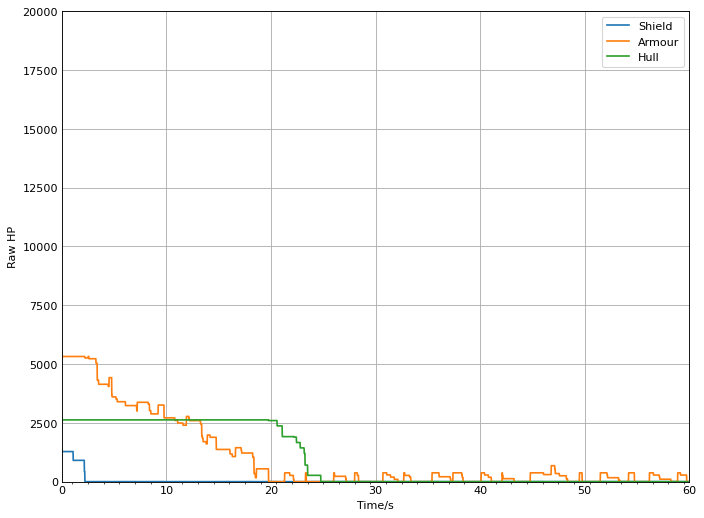

In [97]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# plot
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)

sheild_plot, = ax.plot(timelist, ShieldHP, label='Shield')
armour_plot, = ax.plot(timelist, ArmourHP, label='Armour')
hull_plot, = ax.plot(timelist, HullHP, label='Hull')

ax.set_xlim(0, maxT)
ax.set_ylim(0, 20000)

ax.set_xticks(np.arange(1, maxT, 1.5), minor=True)

ax.set_xlabel("Time/s")
ax.set_ylabel("Raw HP")

ax.legend(handles=[sheild_plot, armour_plot, hull_plot])



plt.show()